In [1]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np


In [2]:
sys.path.insert(0,os.path.join(os.getcwd(), '../'))
module_path = os.path.abspath(os.path.join('../src'))
if module_path not in sys.path:
    sys.path.append(module_path)


In [3]:
from meteor import MeteorPatternScaling

/home/sanderson/anaconda3/lib/python3.9/site-packages/xarray/backends/cfgrib_.py:27: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(


In [4]:
from meteor.prpatt import global_mean

In [5]:
test_data_dir = os.path.join('../tests/test-data')


In [6]:
# NBVAL_IGNORE_OUTPUT
canesm_basic_pattern = MeteorPatternScaling(
        "pdrmip-CanESM2-basic",
        {"tas": 2, "pr": 2},
        lambda exp: os.path.join(test_data_dir, f"pdrmip-{exp}_T42_ANN.nc"),
        exp_list=["base", "co2x2"],
    )



Parameter nystart not in pamset. Using default value 1750
Parameter nyend not in pamset. Using default value 2100
Parameter emstart not in pamset. Using default value 1850
/mnt/c/Users/bensan/OneDrive - CICERO senter for klimaforskning/Documents/GitHub/METEOR/src/meteor/scm_forcer_engine.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.concentrations_data.loc[self.emstart : self.emstart + 6].iloc[
/mnt/c/Users/bensan/OneDrive - CICERO senter for klimaforskning/Documents/GitHub/METEOR/src/meteor/scm_forcer_engine.py:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.emissions_data.loc[self.emstart : self.e

{'emstart': 2101, 'nystart': 1950, 'nyend': 2005, 'idtm': 24, 'conc_run': True, 'lifetime_mode': 'TAR'}
{'emstart': 2101, 'nystart': 1950, 'nyend': 2005, 'idtm': 24, 'conc_run': True, 'lifetime_mode': 'TAR'}


/home/sanderson/anaconda3/lib/python3.9/site-packages/xarray/backends/plugins.py:61: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


[ 0.09839816  0.1019437  -0.03915701 -0.02306744 -0.1542358   0.0129099
  0.07241707  0.08102996  0.06106314 -0.00178799  0.11869994  0.10207038
  0.09585225  0.03869153 -0.07955402  0.04341171 -0.01940982  0.04620834
 -0.08183233 -0.2074668  -0.01027485  0.0300773   0.15501651  0.11698999
 -0.21016987 -0.23377698 -0.10061246 -0.01190061 -0.02158961  0.05744208
  0.1188237   0.07643815  0.1526892   0.14353326  0.06234865 -0.00580085
  0.00556302  0.00566532  0.16317729  0.01055276  0.02148082  0.03919966
  0.00971253 -0.1045122  -0.04921591  0.09411404  0.14153057  0.00976196
 -0.10407798 -0.00662287 -0.00849717  0.16510609  0.04032865  0.12168815
  0.09555333 -0.02318697 -0.14707099 -0.00141252  0.22261965  0.05304966
 -0.07622566 -0.16889247 -0.03492707  0.17497322  0.08188228 -0.13388137
 -0.12702088 -0.18364788  0.01898297 -0.09666344 -0.01164255 -0.16066064
 -0.00376953 -0.04948062 -0.04041923  0.11047341 -0.0570944  -0.16281316
 -0.07916235 -0.13602584  0.03688869 -0.11851402  0.

Plot reconstructions of the pulse-response function

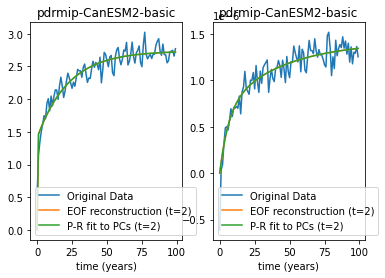

In [7]:
# NBVAL_IGNORE_OUTPUT
f, (ax1, ax2)=plt.subplots(1,2)
canesm_basic_pattern.plot_global_mean_values(ax1,'tas','co2x2')
canesm_basic_pattern.plot_global_mean_values(ax2,'pr','co2x2')


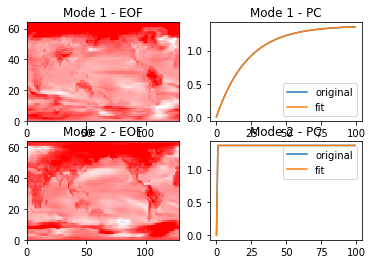

In [8]:
# NBVAL_IGNORE_OUTPUT
#plot spatial patterns associated with each mode
f, ax = plt.subplots(2,2)
ax[0,0].pcolor(canesm_basic_pattern.pattern_dict['co2x2']['tas']["orgeof"]["v"][0, :, :],cmap="bwr",vmin=-2,vmax=2)
ax[0,0].set_title('Mode 1 - EOF')

ax[1,0].pcolor(canesm_basic_pattern.pattern_dict['co2x2']['tas']["orgeof"]["v"][1, :, :],cmap="bwr",vmin=-2,vmax=2)
ax[1,0].set_title('Mode 2 - EOF')

ax[0,1].plot(canesm_basic_pattern.pattern_dict['co2x2']['tas']["orgeof"]["u"][:,0],label='original')
ax[0,1].plot(canesm_basic_pattern.pattern_dict['co2x2']['tas']["neweof"]["u"][:,0],label='fit')
ax[0,1].set_title('Mode 1 - PC')
ax[0,1].legend()
ax[1,1].plot(canesm_basic_pattern.pattern_dict['co2x2']['tas']["orgeof"]["u"][:,1],label='original')
ax[1,1].plot(canesm_basic_pattern.pattern_dict['co2x2']['tas']["neweof"]["u"][:,1],label='fit')
ax[1,1].set_title('Mode 2 - PC')
ax[1,1].legend()


Model test

In [13]:
#define a gaussian forcing profile

f=1*np.exp(-np.square(np.arange(0,1000)-150)/5000)



In [14]:
#run the emulator

mdl_out=canesm_basic_pattern.predict_from_forcing_profile(f, 'tas', exp="co2x2")

(1000, 2)


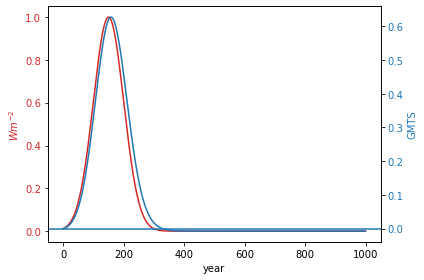

In [15]:
# NBVAL_IGNORE_OUTPUT
#plot global mean forcing and temperature to illustrate lagged response
gmt=global_mean(mdl_out)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('year')
ax1.set_ylabel('$Wm^{-2}$', color=color)
ax1.plot(f, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('GMTS', color=color)  # we already handled the x-label with ax1
ax2.plot(gmt, color=color)
ax2.axhline(0)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
